In [1]:
# Import the necessary libraries..
# Creatre the linear regression.
import numpy as np
import pandas as pd

# Visualise the linear regression.
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creatre a DataFrame to store the data.
# Pass the key value as a list.
data = {'Engine size' : [0.9, 1.0, 1.1, 1.2, 1.4,
                        1.6, 1.8, 2, 2.2, 2.4],
       'Selling Price': [20000, 22000, 23500, 26000,
                        25000, 28250, 29300, 33000,
                        34255, 45000]}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the dataframe.
df

,Engine size,Selling Price
0,0.9,20000
1,1.0,22000
2,1.1,23500
3,1.2,26000
4,1.4,25000
5,1.6,28250
6,1.8,29300
7,2.0,33000
8,2.2,34255
9,2.4,45000


In [3]:
# Apply pandas correlation method.
df.corr()

,Engine size,Selling Price
Engine size,1.000000,0.943372
Selling Price,0.943372,1.000000


(0.0, 2.5)

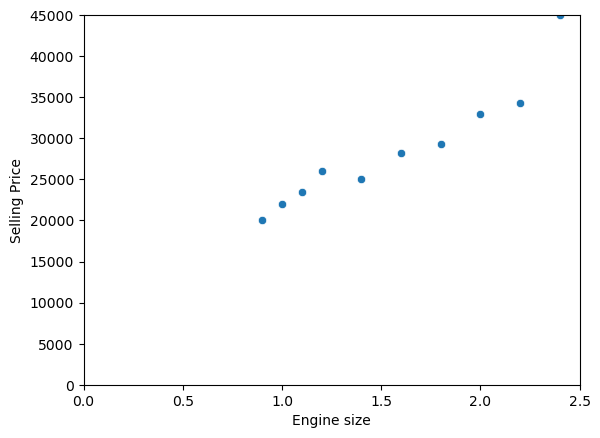

In [4]:
# Start with a visualisation before running linear regression
sns.scatterplot(data=df,
               x = 'Engine size',
               y = 'Selling Price')

# Set axis values.
plt.ylim(0, 45000)
plt.xlim(0, 2.5)

In [6]:
# Fit the linear model.
# Polyfit() good to use for simple linear regression (only one variable)
# See whether we can predict the selling price based on the engine size.
reg = np.polyfit(df['Engine size'],
                 df['Selling Price'],
                # Degree = 1, degree of polynomium, for SLR always 1.
                deg= 1)

#View the output
reg

array([13170.37037037,  8084.72222222])

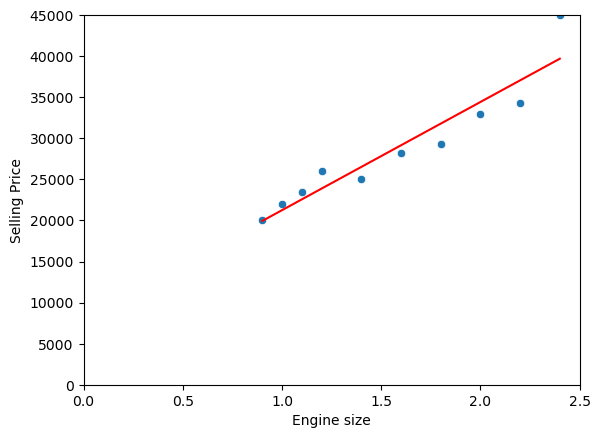

In [8]:
# Add a trendline to visualise the linear regression.
# Use the NumPy polyval method, and specify the regression and the independent variable.
trend = np.polyval(reg, df['Engine size'])

# View the previous scatterplot
sns.scatterplot(data=df,
               x = 'Engine size',
               y = 'Selling Price')

# Set axis values.
plt.ylim(0, 45000)
plt.xlim(0, 2.5)

# Add the trendline.
plt.plot(df['Engine size'],
        trend,
        color = 'red')

In [12]:
# Install the statsmodel package.
!pip install statsmodels

# Import the necessary libraries.
import numpy as np
import pandas as pd

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# The statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

#import and read the data file (car4u.csv)
cars = pd.read_csv('car4u.csv')

# View the DataFrame.
print(cars.head())
print(cars.info())
cars.describe()

   Engine size  Selling price
0           77      79.775152
1           21      23.177279
2           22      25.609262
3           20      17.857388
4           36      41.849864
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Engine size    300 non-null    int64  
 1   Selling price  300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB
None


,Engine size,Selling price
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


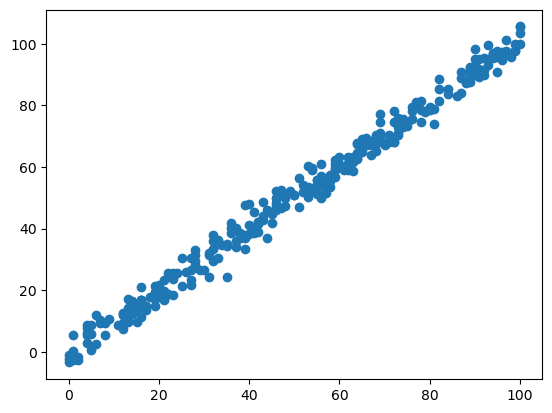

In [13]:
# Define the dependent variable.
y = cars['Selling price']

# Define the independent variable.
x = cars['Engine size']

# Check for linearity with matplotlib
plt.scatter(x,y)

In [14]:
# Create formula and pass through OLD methods.

f = 'y ~ x'
test = ols(f, data= cars).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.709e+04
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          1.33e-294
Time:                        19:48:08   Log-Likelihood:                -757.98
No. Observations:                 300   AIC:                             1520.
Df Residuals:                     298   BIC:                             1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4618      0.360     -1.284      0.200      -1.169       0.246
x              1.0143      0.006    164.598      0.000       1.002       1.026
==============================================================================
Omnibus:                        1.034   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.596   Jarque-Bera (JB):                0.825
Skew:                           0.117   Prob(JB):                        0.662
Kurtosis:                       3.104   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Extract the estimated parameter.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -0.461811
x            1.014335
dtype: float64
Standard errors:  Intercept    0.359560
x            0.006162
dtype: float64
Predicted values:  [ 77.64201157  20.83923168  21.85356704  19.82489633  36.05426201
  14.75321955  62.42698124  95.90004796  19.82489633   4.609866
   3.59553065  18.81056097  96.91438332  62.42698124  36.05426201
  14.75321955  65.46998731  13.7388842   87.78536512  69.52732873
  89.81403583  51.26929234  89.81403583  26.92524381  97.92871867
  58.36963982  79.67068228  20.83923168  93.87137725  26.92524381
  99.95738938  30.98258524  33.01125595  80.68501764  27.93957917
  47.21195092  53.29796305  69.52732873  27.93957917  33.01125595
  91.84270654  71.55599944  50.25495698  76.62767622   3.59553065
  37.06859737  70.54166408  68.51299337  40.11160343  35.03992666
  94.88571261  88.79970048  52.28362769  30.98258524  59.38397518
  -0.46181077  39.09726808  64.45565195  69.52732873  57.35530447
  12.72454884  72.57033479  76.62767622  6

In [16]:
# Create the linear regression model.
# Set the coefficient to 1.0143 and the constant to -0.4618.
y_pred = (-0.4618) + 1.0143 * cars['Engine size']

# View the output
y_pred

0      77.6393
1      20.8385
2      21.8528
3      19.8242
4      36.0530
        ...   
295    71.5535
296    46.1960
297    55.3247
298    62.4248
299    47.2103
Name: Engine size, Length: 300, dtype: float64

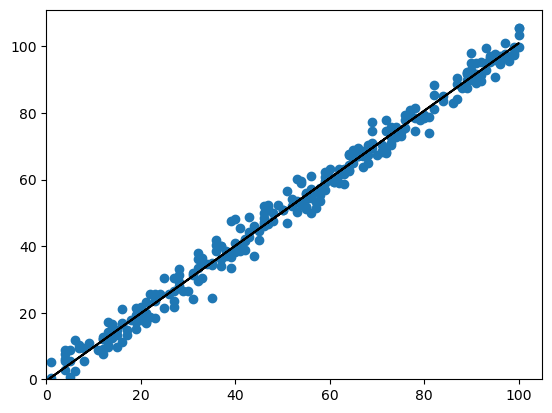

In [17]:
# Plot the data points with a scatterplot.
plt.scatter(x,y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()